In [1]:
import numpy as np
import matplotlib.pyplot as plt

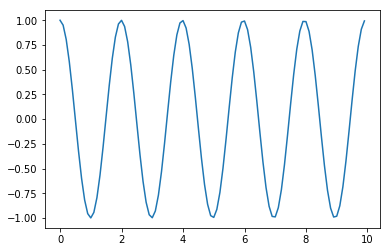

In [6]:
a = 0
b = 10.0
N =100
h = (b-a)/N

tpoints = np.arange(a,b,h)
xpoints = []
upoints = []


def F(x, u):
    k = 10.0
    m = 1.0
    return -(k/m)*x

x = 1.0
u = 0
for t in tpoints:
    xpoints.append(x)
    upoints.append(u)

    l1 = h*u
    k1 = h*F(x, u)  

    l2 = h*(u + 0.5*k1)
    k2 = h*F(x + 0.5*l1, u + 0.5*k1)

    l3 = h*(u + 0.5*k2)
    k3 = h*F(x + 0.5*l2, u + 0.5*k2)

    l4 = h*(u + k3)
    k4 = h*F(x + l3, u + k3)

    x += (l1 + 2*l2 + 2*l3 + l4)/6
    u += (k1 + 2*k2 + 2*k3 + k4)/6

plt.plot(tpoints, xpoints)
#plt.plot(tpoints, upoints)